<a href="https://colab.research.google.com/github/johnsDevassy/Hackthon/blob/master/holiday_season.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading Modules

In [1]:
#!sudo apt-get install imagemagick
!pip install imbalanced-learn

In [2]:
from zipfile import ZipFile 
import numpy as np
from PIL import Image
from os import listdir
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


#Loading dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
zip=ZipFile("/content/drive/MyDrive/datasets/14feeca248c811eb.zip")
zip.extractall()

converting to numpy arrays

In [6]:
s=[]
for filename in listdir('/content/dataset/train'):
  s.append(np.asarray(Image.open('/content/dataset/train/'+filename)))


In [7]:
s=np.array(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [8]:
#s[3].shape

Problems came in to my mind when started to preprocssing


*   Different dimensions for every images
*   The number of images for classes except misc is very low
*   more time is taken to concat the arrays of images when i used numpy array concat

Solutions Found

*   Manu sir told me 2 approches to overcome the different dimensions problem
      *   Try rescaling the images to feasible dimension(But what will be it)
      *   You can subdivide the image in tiles, perform prediction on the tiles and stitch them together(Dont know need to find out)
* Now number of images for other class can be increased by oversampling.
*   First create dataset with list and cnvert into arrays




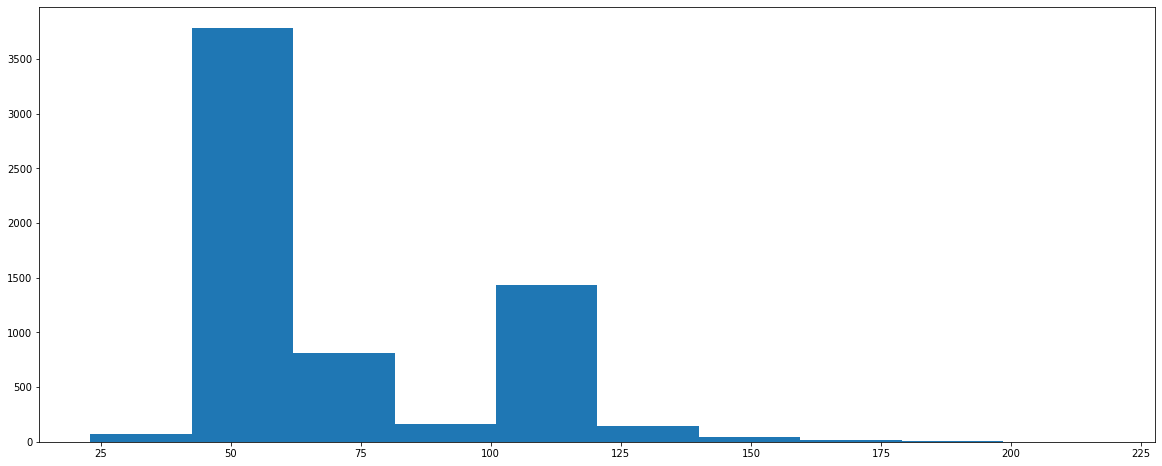

In [9]:
x=[]
y=[]
for i in range(s.shape[0]):
  x.append(s[i].shape[0])
  y.append(s[i].shape[1])
plt.figure(figsize=(20,8))
plt.hist(x)
plt.show()

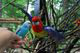

In [10]:
img=Image.open('/content/dataset/train/'+'image3476.jpg')
img

Seems like the best dimension to load images are 80*80 square. so i choosed it

In [11]:
df=pd.read_csv("/content/dataset/train.csv")

i load the dataset that contains the labels of each image

In [12]:
df.head()

,Image,Class
0,image3476.jpg,Miscellaneous
1,image5198.jpg,Candle
2,image4183.jpg,Snowman
3,image1806.jpg,Miscellaneous
4,image7831.jpg,Miscellaneous


In [13]:
df['Class'].tail()

6464    Christmas_Tree
6465     Miscellaneous
6466          Airplane
6467            Candle
6468          Airplane
Name: Class, dtype: object

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6469 entries, 0 to 6468
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   6469 non-null   object
 1   Class   6469 non-null   object
dtypes: object(2)
memory usage: 101.2+ KB


Created a new dataframe to load the labels to the NN model

In [15]:
newnd=pd.DataFrame(columns=['img','classval'])

In [16]:
df.loc[df['Image']=='image7005.jpg','Class']

1661    Miscellaneous
Name: Class, dtype: object

image431.jpg
image3405.jpg
image4900.jpg
image1276.jpg
image5428.jpg


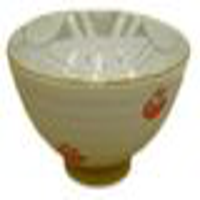

In [17]:
q=[]
size=80,80
z=0
kl=0
for filename in listdir('/content/dataset/train'):
  img=Image.open('/content/dataset/train/'+filename)
  img=img.convert('RGB')
  img=img.resize((200,200))
  newnd.loc[len(newnd.index)]=[filename,df.loc[df['Image']==filename,'Class'].values[0]]
  if kl<5:
    print(filename)
  kl+=1

  z+=1
  if (z==43):
    imgq=Image.open('/content/dataset/train/'+filename)
    imgq=imgq.resize((200,200))
    imgq=np.asarray(img,dtype=np.uint8)
  q.append(np.asarray(img,dtype=np.uint8))
Image.fromarray(imgq,'RGB')

Now loaded the images and and created a new dataset that contain the image and class in correct order

In [18]:
newnd.tail()

,img,classval
6464,image5127.jpg,Miscellaneous
6465,image6416.jpg,Miscellaneous
6466,image5923.jpg,Christmas_Tree
6467,image114.jpg,Miscellaneous
6468,image1010.jpg,Miscellaneous


In [19]:
newnd.loc[newnd['img']=='image1003.jpg']

,img,classval
90,image1003.jpg,Miscellaneous


Performing the label encoder to convert it to integers

In [20]:
newnd['classval'].values

array(['Snowman', 'Candle', 'Christmas_Tree', ..., 'Christmas_Tree',
       'Miscellaneous', 'Miscellaneous'], dtype=object)

In [21]:
lbcoder=LabelEncoder()
lab=lbcoder.fit_transform(np.asarray(newnd['classval']))

In [22]:
newnd['classval']=lab

In [23]:
newnd.tail()

,img,classval
6464,image5127.jpg,4
6465,image6416.jpg,4
6466,image5923.jpg,2
6467,image114.jpg,4
6468,image1010.jpg,4


In [24]:
set(newnd.classval)

{0, 1, 2, 3, 4, 5}

In [25]:
q[42].shape

(200, 200, 3)

In [26]:
q=np.asarray(q)

In [27]:
q.shape

(6469, 200, 200, 3)

In [28]:
newnd.classval.shape

(6469,)

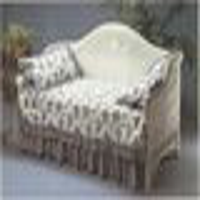

In [29]:
Image.fromarray(q[-5],'RGB')


Converting the categorical labels to the 1,0 matrix

In [30]:
from keras.utils import to_categorical
doit=to_categorical(newnd.classval)

In [31]:
doit

array([[0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

Now training the model. But before that we have to do some slitting

In [32]:
newnd.classval.value_counts()

4    2801
2    1539
3     640
1     593
0     535
5     361
Name: classval, dtype: int64

#See the data structure. whether it is correct or not

In [33]:
newnd.tail()

,img,classval
6464,image5127.jpg,4
6465,image6416.jpg,4
6466,image5923.jpg,2
6467,image114.jpg,4
6468,image1010.jpg,4


#Train test split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(q, doit, test_size = 0.1, random_state = 41, shuffle = True, stratify = y)

# Simple training

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=11,validation_data=(X_test, y_test))

Epoch 1/11
182/182 [==============================] - 12s 25ms/step - loss: 8.0589 - accuracy: 0.4452 - val_loss: 0.3587 - val_accuracy: 0.5549
Epoch 2/11
182/182 [==============================] - 4s 22ms/step - loss: 0.2958 - accuracy: 0.6435 - val_loss: 0.3267 - val_accuracy: 0.5796
Epoch 3/11
182/182 [==============================] - 4s 22ms/step - loss: 0.1822 - accuracy: 0.7987 - val_loss: 0.3869 - val_accuracy: 0.5750
Epoch 4/11
182/182 [==============================] - 4s 22ms/step - loss: 0.0994 - accuracy: 0.9169 - val_loss: 0.4647 - val_accuracy: 0.5564
Epoch 5/11
182/182 [==============================] - 4s 22ms/step - loss: 0.0543 - accuracy: 0.9621 - val_loss: 0.5503 - val_accuracy: 0.5796
Epoch 6/11
182/182 [==============================] - 4s 21ms/step - loss: 0.0330 - accuracy: 0.9798 - val_loss: 0.5033 - val_accuracy: 0.5811
Epoch 7/11
182/182 [==============================] - 4s 22ms/step - loss: 0.0236 - accuracy: 0.9867 - val_loss: 0.6330 - val_accuracy: 0.579

At first i thought the model is over-fitted. So i  resampled the dataset and trained it again.

In [ ]:
y_pred = model.predict (X_test)


In [ ]:
for i in range(len(y_pred)):
  for j in range(6):
    if y_pred[i][j]==max(y_pred[i]):
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0



In [ ]:
y_pred

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

The predicted values converted to 0 and 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5919629057187017


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.25      0.34        55
           1       0.69      0.41      0.52        58
           2       0.62      0.69      0.65       159
           3       0.57      0.43      0.49        58
           4       0.60      0.73      0.66       273
           5       0.35      0.27      0.31        44

   micro avg       0.59      0.59      0.59       647
   macro avg       0.56      0.46      0.49       647
weighted avg       0.59      0.59      0.58       647
 samples avg       0.59      0.59      0.59       647



# Lets do some reshaping to do smoting and etc. 

Resampling the dataset. Smote only recieves 2d input. so we have to resahpe.

In [ ]:
X_train.shape

(5822, 200, 200, 3)

In [ ]:
reshapedx=X_train
reshapedy=y_train
reshapedx=reshapedx.reshape((5822,120000))

#Smote training

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(reshapedx, reshapedy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

After using smote we have convert dataset to its previous shape

In [ ]:
y_smote.shape

(15168, 6)

In [ ]:
X_smote.shape

(15168, 120000)

In [ ]:
X_smote=X_smote.reshape((15168, 200, 200, 3))
X_smote.shape

(15168, 200, 200, 3)

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_smote,y_smote,epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
474/474 [==============================] - 10s 19ms/step - loss: 0.7301 - accuracy: 0.3528 - val_loss: 0.3126 - val_accuracy: 0.5549
Epoch 2/30
474/474 [==============================] - 9s 19ms/step - loss: 0.2869 - accuracy: 0.6275 - val_loss: 0.2966 - val_accuracy: 0.5951
Epoch 3/30
474/474 [==============================] - 9s 19ms/step - loss: 0.2374 - accuracy: 0.6937 - val_loss: 0.3015 - val_accuracy: 0.6399
Epoch 4/30
474/474 [==============================] - 9s 19ms/step - loss: 0.1979 - accuracy: 0.7538 - val_loss: 0.3124 - val_accuracy: 0.5981
Epoch 5/30
474/474 [==============================] - 9s 19ms/step - loss: 0.1513 - accuracy: 0.8206 - val_loss: 0.3017 - val_accuracy: 0.6383
Epoch 6/30
474/474 [==============================] - 9s 19ms/step - loss: 0.1259 - accuracy: 0.8541 - val_loss: 0.3493 - val_accuracy: 0.6213
Epoch 7/30
474/474 [==============================] - 9s 19ms/step - loss: 0.0928 - accuracy: 0.9029 - val_loss: 0.3822 - val_accuracy: 0.618

At first i thought the model is over-fitted. So i  resampled the dataset and trained it again. The overfitting begins at epoch 8

In [ ]:
y_pred = model.predict (X_test)


In [ ]:
for i in range(len(y_pred)):
  for j in range(6):
    if y_pred[i][j]==max(y_pred[i]):
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0



In [ ]:
y_pred

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

The predicted values converted to 0 and 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.5857805255023184


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.43      0.55      0.48        55
           1       0.62      0.48      0.54        58
           2       0.68      0.76      0.72       159
           3       0.54      0.55      0.55        58
           4       0.60      0.56      0.58       273
           5       0.36      0.34      0.35        44

   micro avg       0.59      0.59      0.59       647
   macro avg       0.54      0.54      0.54       647
weighted avg       0.59      0.59      0.58       647
 samples avg       0.59      0.59      0.59       647



Our training accuracy is 95 % but our testing accuracy is only 62% which means the model is overfitted. But when we see the classification report we can see the precision for most of the classes is getting in a same range.

# What about random_over_sampling

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(reshapedx, reshapedy)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_over, y_over)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
X_over.shape

(15168, 120000)

In [ ]:
X_over=X_over.reshape((15168, 200, 200, 3))

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=40,validation_data=(X_test, y_test))

Epoch 1/25
182/182 [==============================] - 4s 21ms/step - loss: 0.8153 - accuracy: 0.4442 - val_loss: 0.3104 - val_accuracy: 0.5858
Epoch 2/25
182/182 [==============================] - 4s 20ms/step - loss: 0.3032 - accuracy: 0.5959 - val_loss: 0.2957 - val_accuracy: 0.5920
Epoch 3/25
182/182 [==============================] - 4s 20ms/step - loss: 0.2812 - accuracy: 0.6342 - val_loss: 0.2788 - val_accuracy: 0.6043
Epoch 4/25
182/182 [==============================] - 4s 20ms/step - loss: 0.2477 - accuracy: 0.6923 - val_loss: 0.2688 - val_accuracy: 0.6507
Epoch 5/25
182/182 [==============================] - 4s 20ms/step - loss: 0.2404 - accuracy: 0.6956 - val_loss: 0.2746 - val_accuracy: 0.6182
Epoch 6/25
182/182 [==============================] - 4s 20ms/step - loss: 0.2067 - accuracy: 0.7467 - val_loss: 0.2680 - val_accuracy: 0.6538
Epoch 7/25
182/182 [==============================] - 4s 20ms/step - loss: 0.1899 - accuracy: 0.7624 - val_loss: 0.3148 - val_accuracy: 0.6291

In [ ]:
y_pred = model.predict (X_test)


In [ ]:
for i in range(len(y_pred)):
  for j in range(6):
    if y_pred[i][j]==max(y_pred[i]):
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0



In [ ]:
y_pred

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

The predicted values converted to 0 and 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6290571870170015


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53        55
           1       0.63      0.45      0.53        58
           2       0.75      0.67      0.70       159
           3       0.50      0.31      0.38        58
           4       0.62      0.76      0.68       273
           5       0.49      0.52      0.51        44

   micro avg       0.63      0.63      0.63       647
   macro avg       0.59      0.53      0.55       647
weighted avg       0.63      0.63      0.62       647
 samples avg       0.63      0.63      0.63       647



Oversampling improved acuracy

#Lets do Undersampling

In [ ]:
reshapedx.shape

(5822, 120000)

In [ ]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(reshapedx, reshapedy)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_under, y_under)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_under, y_under)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_under, y_under)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_under, y_under)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
y_under.shape

(1902, 6)

In [ ]:
X_under=X_under.reshape((1902,200,200,3))

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2), 
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_under,y_under,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
60/60 [==============================] - 2s 27ms/step - loss: 1.3869 - accuracy: 0.2892 - val_loss: 0.4140 - val_accuracy: 0.3261
Epoch 2/30
60/60 [==============================] - 1s 23ms/step - loss: 0.3688 - accuracy: 0.4828 - val_loss: 0.4388 - val_accuracy: 0.2875
Epoch 3/30
60/60 [==============================] - 1s 23ms/step - loss: 0.3340 - accuracy: 0.5359 - val_loss: 0.4204 - val_accuracy: 0.2859
Epoch 4/30
60/60 [==============================] - 1s 23ms/step - loss: 0.3033 - accuracy: 0.5821 - val_loss: 0.4690 - val_accuracy: 0.3369
Epoch 5/30
60/60 [==============================] - 1s 23ms/step - loss: 0.2775 - accuracy: 0.6427 - val_loss: 0.3337 - val_accuracy: 0.5549
Epoch 6/30
60/60 [==============================] - 1s 23ms/step - loss: 0.2467 - accuracy: 0.6692 - val_loss: 0.3530 - val_accuracy: 0.5301
Epoch 7/30
60/60 [==============================] - 1s 23ms/step - loss: 0.2165 - accuracy: 0.7176 - val_loss: 0.4377 - val_accuracy: 0.3910
Epoch 8/30
60

In [ ]:
y_pred = model.predict (X_test)


In [ ]:
for i in range(len(y_pred)):
  for j in range(6):
    if y_pred[i][j]==max(y_pred[i]):
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0



In [ ]:
y_pred

array([[0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

The predicted values converted to 0 and 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

0.508500772797527


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.36      0.55      0.43        55
           1       0.48      0.57      0.52        58
           2       0.65      0.64      0.65       159
           3       0.41      0.62      0.49        58
           4       0.64      0.36      0.46       273
           5       0.30      0.68      0.42        44

   micro avg       0.51      0.51      0.51       647
   macro avg       0.48      0.57      0.50       647
weighted avg       0.56      0.51      0.51       647
 samples avg       0.51      0.51      0.51       647



oops this gives the lowest accuracy

#The final case. **Image_Data_generator** 


this one i don't get it **i am getting it**

In [35]:
from keras.preprocessing.image import ImageDataGenerator
from imblearn.keras import balanced_batch_generator
from keras.utils.data_utils import Sequence
import cv2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [36]:
class BalancedDataGenerator(Sequence):
    """ImageDataGenerator + RandomOversampling"""
    def __init__(self, x, y, datagen, batch_size=32):
        self.datagen = datagen
        self.batch_size = min(batch_size, x.shape[0])
        datagen.fit(x)
        self.gen, self.steps_per_epoch = balanced_batch_generator(x.reshape(x.shape[0], -1), y, sampler=RandomOverSampler(), batch_size=self.batch_size, keep_sparse=True)
        self._shape = (self.steps_per_epoch * batch_size, *x.shape[1:])
        
    def __len__(self):
        return self.steps_per_epoch

    def __getitem__(self, idx):
        x_batch, y_batch = self.gen.__next__()
        x_batch = x_batch.reshape(-1, *self._shape[1:])
        return self.datagen.flow(x_batch, y_batch, batch_size=self.batch_size).next()

To undersatnd follow this link, https://theailearner.com/2019/07/06/data-augmentation-with-keras-imagedatagenerator/
https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/
https://keras.io/api/preprocessing/image/

In [37]:
def blur(img):
    return (cv2.blur(img,(5,5)))

In [38]:
datagen = ImageDataGenerator(
 rotation_range=40,
 shear_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest',
 #rescale=1/255,
 brightness_range=[0.2,0.8],
 )


In [39]:
balanced_gen = BalancedDataGenerator(X_train, y_train, datagen, batch_size=32)
steps_per_epoch = balanced_gen.steps_per_epoch

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dense(1024,activation='relu'),   
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit_generator(balanced_gen,steps_per_epoch,epochs=55,validation_data=(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/55
474/474 [==============================] - 148s 297ms/step - loss: 0.9554 - accuracy: 0.4284 - val_loss: 0.3756 - val_accuracy: 0.4992
Epoch 2/55
474/474 [==============================] - 141s 297ms/step - loss: 0.3030 - accuracy: 0.5862 - val_loss: 0.3488 - val_accuracy: 0.5456
Epoch 3/55
 33/474 [=>............................] - ETA: 2:10 - loss: 0.2759 - accuracy: 0.6346

In [ ]:
model=tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(16,(3,3),activation='relu', input_shape=(200,200,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512,activation='relu'),
      tf.keras.layers.Dense(1024,activation='relu'),
      tf.keras.layers.Dense(6,activation='sigmoid')                             
])
model.compile(optimizer=tf.optimizers.Adam(),loss='binary_crossentropy',metrics=['accuracy'])
model.fit_generator(balanced_gen,steps_per_epoch,epochs=55,validation_data=(X_test,y_test))

At first i thought the model is over-fitted. So i  resampled the dataset and trained it again.

In [ ]:
y_pred = model.predict (X_test)


In [ ]:
for i in range(len(y_pred)):
  for j in range(6):
    if y_pred[i][j]==max(y_pred[i]):
      y_pred[i][j]=1
    else:
      y_pred[i][j]=0



In [ ]:
y_pred

The predicted values converted to 0 and 1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))